In [1]:
import numpy as np
pi = np.pi
arccos = np.arccos
arctan = np.arctan
sin = np.sin
tan = np.tan
sqrt = np.sqrt

from matplotlib import pyplot as plt

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib
%matplotlib inline

import qiskit
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import math

simulator = Aer.get_backend('qasm_simulator')

In [2]:
def circuit(angle1):

    circ = QuantumCircuit(3)
    circ.ry(2*arccos(-sqrt((2/3)*sin(angle1))), 0)
    circ.ry(pi/2+(pi/4)+arctan((tan(angle1))/(sqrt(3))), 1)
    circ.ry(pi, 2)
    
    
    circ.cx(0,1)
    circ.ry(-(pi/4)-arctan((tan(angle1))/(sqrt(3))),1)
    
    circ.cx(1,2)
    circ.cx(0,1)
                 
    return circ

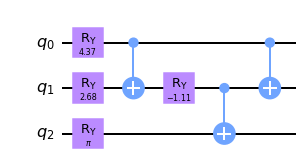

In [3]:
#Codificación del estado de prueba
circuit1 = circuit(pi/6)
circuit1.draw(output = 'mpl')

In [8]:
def measure_zz_circuit(given_circuit):
    
    zz_meas = given_circuit.copy()
    zz_meas.measure_all()
    
    return zz_meas


def measure_yy_circuit(given_circuit):
    yy_meas = given_circuit.copy()
    
    yy_meas.sdg(0)
    yy_meas.h(0)
    yy_meas.sdg(1)
    yy_meas.h(1)
    yy_meas.sdg(2)
    yy_meas.h(2)
    
    yy_meas.measure_all()
    
    return yy_meas


def measure_xx_circuit(given_circuit):
    xx_meas = given_circuit.copy()
    
    xx_meas.h(0)
    xx_meas.h(1)
    xx_meas.h(2)
    
    xx_meas.measure_all()
    
    return xx_meas


In [9]:
def measure_totalinz(given_circuit, num_shots = 10000):

    zz_meas = measure_zz_circuit(given_circuit)
    job = execute(zz_meas, backend = simulator, shots = num_shots)
    result = job.result()
    counts = result.get_counts(zz_meas)
    

    if '000' not in counts:
        counts['000'] = 0
    if '001' not in counts:
        counts['001'] = 0
    if '010' not in counts:
        counts['010'] = 0
    if '011' not in counts:
        counts['011'] = 0 
    if '100' not in counts:
        counts['100'] = 0
    if '101' not in counts:
        counts['101'] = 0
    if '110' not in counts:
        counts['110'] = 0
    if '111' not in counts:
        counts['111'] = 0

    total_counts = counts['000'] + counts['001'] + counts['010'] + counts['011']+counts['100'] + counts['101'] + counts['110'] + counts['111']
    zii = counts['000'] + counts['001'] + counts['010'] + counts['011'] - counts['100'] - counts['101'] - counts['110'] - counts['111']
    izi = counts['000'] + counts['001'] - counts['010'] - counts['011'] + counts['100'] + counts['101'] - counts['110'] - counts['111']
    iiz = counts['000'] - counts['001'] + counts['010'] - counts['011'] + counts['100'] - counts['101'] + counts['110'] - counts['111']

    zii = zii / total_counts
    izi = izi / total_counts
    iiz = iiz / total_counts
    
   
    return zii, izi, iiz

def measure_totalinx(given_circuit, num_shots = 10000):

    xx_meas = measure_xx_circuit(given_circuit)
    
    job = execute(xx_meas, backend = simulator, shots = num_shots)
    result = job.result()
    counts = result.get_counts(xx_meas)
    

    if '000' not in counts:
        counts['000'] = 0
    if '001' not in counts:
        counts['001'] = 0
    if '010' not in counts:
        counts['010'] = 0
    if '011' not in counts:
        counts['011'] = 0 
    if '100' not in counts:
        counts['100'] = 0
    if '101' not in counts:
        counts['101'] = 0
    if '110' not in counts:
        counts['110'] = 0
    if '111' not in counts:
        counts['111'] = 0

    total_counts = counts['000'] + counts['001'] + counts['010'] + counts['011']+counts['100'] + counts['101'] + counts['110'] + counts['111']
    xxi = counts['000'] + counts['001'] - counts['010'] - counts['011'] - counts['100'] - counts['101'] + counts['110'] + counts['111']
    xix = counts['000'] - counts['001'] + counts['010'] - counts['011'] - counts['100'] + counts['101'] - counts['110'] + counts['111']
    ixx = counts['000'] - counts['001'] - counts['010'] + counts['011'] + counts['100'] - counts['101'] - counts['110'] + counts['111']

    xxi = xxi / total_counts
    xix = xix / total_counts
    ixx = ixx / total_counts
    
   
    return xxi,xix,ixx

def measure_totaliny(given_circuit, num_shots = 10000):

    yy_meas = measure_yy_circuit(given_circuit)
    
    job = execute(yy_meas, backend = simulator, shots = num_shots)
    result = job.result()
    counts = result.get_counts(yy_meas)
    

    if '000' not in counts:
        counts['000'] = 0
    if '001' not in counts:
        counts['001'] = 0
    if '010' not in counts:
        counts['010'] = 0
    if '011' not in counts:
        counts['011'] = 0 
    if '100' not in counts:
        counts['100'] = 0
    if '101' not in counts:
        counts['101'] = 0
    if '110' not in counts:
        counts['110'] = 0
    if '111' not in counts:
        counts['111'] = 0

    total_counts = counts['000'] + counts['001'] + counts['010'] + counts['011']+counts['100'] + counts['101'] + counts['110'] + counts['111']
    xxi = counts['000'] + counts['001'] - counts['010'] - counts['011'] - counts['100'] - counts['101'] + counts['110'] + counts['111']
    xix = counts['000'] - counts['001'] + counts['010'] - counts['011'] - counts['100'] + counts['101'] - counts['110'] + counts['111']
    ixx = counts['000'] - counts['001'] - counts['010'] + counts['011'] + counts['100'] - counts['101'] - counts['110'] + counts['111']

    xxi = xxi / total_counts
    xix = xix / total_counts
    ixx = ixx / total_counts
    
   
    return xxi,xix,ixx


In [10]:
zz = measure_totalinz(circuit1)
print("<ZZ> =", str(zz))

xx = measure_totaliny(circuit1)
print("<XX> =", str(xx))

yy = measure_totaliny(circuit1)
print("<YY> =", str(yy))

<ZZ> = (-0.5296, -0.5352, -0.3204)
<XX> = (0.724, 0.8334, 0.837)
<YY> = (0.7238, 0.8424, 0.8402)


In [13]:
def get_energy(given_circuit, num_shots = 1000):
    
    z = measure_totalinz(given_circuit, num_shots = num_shots)
    zii = z[0]
    izi = z[1]
    iiz = z[2]
    
    x = measure_totalinx(given_circuit, num_shots = num_shots)
    xxi = x[0]
    xix = x[1]
    ixx = x[2]

    y = measure_totalinx(given_circuit, num_shots = num_shots)
    yyi = y[0]
    yiy = y[1]
    iyy = y[2]
    
     
    energy = (1/2)*(zii + izi + iiz) + (1/12)*(6*1 + 2*xxi + 2*xix + 2*ixx + 2*yyi + 2*yiy + 2*iyy)
    
    return energy

In [14]:
angles = [0., 0.0314159, 0.0628319, 0.0942478, 0.125664, 0.15708, 0.188496, \
0.219911, 0.251327, 0.282743, 0.314159, 0.345575, 0.376991, 0.408407, \
0.439823, 0.471239, 0.502655, 0.534071, 0.565487, 0.596903, 0.628319, \
0.659734, 0.69115, 0.722566, 0.753982, 0.785398, 0.816814, 0.84823, \
0.879646, 0.911062, 0.942478, 0.973894, 1.00531, 1.03673, 1.06814, \
1.09956, 1.13097, 1.16239, 1.19381, 1.22522, 1.25664, 1.28805, \
1.31947, 1.35088, 1.3823, 1.41372, 1.44513, 1.47655, 1.50796, \
1.53938, 1.5708, 1.60221, 1.63363, 1.66504, 1.69646, 1.72788, \
1.75929, 1.79071, 1.82212, 1.85354, 1.88496, 1.91637, 1.94779, \
1.9792, 2.01062, 2.04204, 2.07345, 2.10487, 2.13628, 2.1677, 2.19911, \
2.23053, 2.26195, 2.29336, 2.32478, 2.35619, 2.38761, 2.41903, \
2.45044, 2.48186, 2.51327, 2.54469, 2.57611, 2.60752, 2.63894, \
2.67035, 2.70177, 2.73319, 2.7646, 2.79602, 2.82743, 2.85885, \
2.89027, 2.92168, 2.9531, 2.98451, 3.01593, 3.04734, 3.07876, \
3.11018, 3.14159]

energies=[]

for i in angles:
    energy = get_energy(circuit(i))
    energies.append(energy)
    
energies

[-1.002,
 -1.1,
 -1.104,
 -1.1099999999999999,
 -1.082,
 -1.0386666666666666,
 -1.04,
 -1.0293333333333332,
 -0.9479999999999998,
 -0.9033333333333334,
 -0.8506666666666667,
 -0.8373333333333334,
 -0.73,
 -0.6926666666666667,
 -0.6413333333333334,
 -0.6200000000000001,
 -0.542,
 -0.44066666666666665,
 -0.38799999999999996,
 -0.2993333333333334,
 -0.24533333333333332,
 -0.236,
 -0.1886666666666667,
 -0.08266666666666656,
 -0.017333333333333256,
 0.08000000000000007,
 0.09533333333333333,
 0.14933333333333315,
 0.2506666666666666,
 0.35,
 0.3806666666666666,
 0.4693333333333334,
 0.5393333333333333,
 0.6473333333333333,
 0.6466666666666667,
 0.7539999999999999,
 0.8713333333333333,
 0.8873333333333333,
 1.0100000000000002,
 1.032,
 1.1106666666666667,
 1.2093333333333334,
 1.2513333333333332,
 1.2933333333333334,
 1.3820000000000001,
 1.4333333333333333,
 1.4866666666666668,
 1.516,
 1.5873333333333333,
 1.6513333333333333,
 0.7599999999999999,
 0.7593333333333333,
 0.7546666666666666,
 

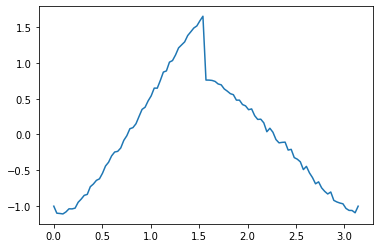

In [15]:
plt.plot(angles,energies)